In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("car_price.csv", sep=",", encoding="utf-8")
df.drop(columns=["car_ID"], inplace=True)

In [62]:
df.shape

(205, 25)

In [63]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Correlation Matrix

<Axes: >

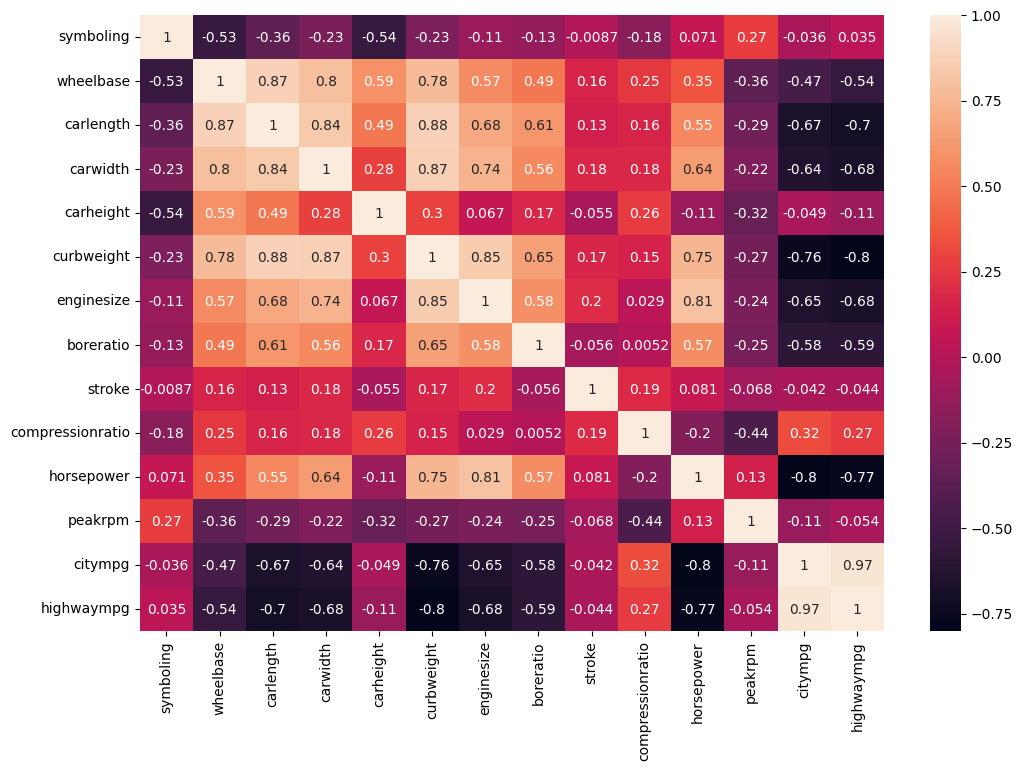

In [82]:
numeric_columns = df.select_dtypes(include=["number"]).drop(columns=['price'], axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(numeric_columns.corr(), annot=True)

In [ ]:
# I'll drop highwaympg because it's too related to citympg, futher having a 
# correlation higher than 60% with a lot other variables

#curbweight will be dropped too

## CAR NAME

In [64]:
# Finding a way to deal with carname 
print(f"different models --> {df.CarName.nunique()}")

df.CarName.value_counts()

different models --> 147


CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [65]:
# I will persiste only the brand
car_brand = lambda x: x.split(' ')[0].lower()
df.brand = df.CarName.apply(car_brand)

/tmp/ipykernel_10654/213789209.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.brand = df.CarName.apply(car_brand)


In [66]:
print(f"different models --> {df.brand.nunique()}")

df.brand.unique()

different models --> 27


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [67]:
fix_values = {"maxda": "mazda", 
              "porcshce": "porsche", 
              "toyouta": "toyota", 
              "vokswagen": "volkswagen", 
              "vw": "volkswagen"
              }

fix_car_brand = lambda x: fix_values[x] if x in fix_values.keys() else x

df.brand = df.brand.apply(fix_car_brand)

In [68]:
print(f"different models --> {df.brand.nunique()}")

different models --> 22


# FUEL TYPE

In [69]:

print(f"different fuel type --> {df.fueltype.nunique()}")

df.fueltype.value_counts()

# Few types, it's possible to use One Hot Encoding too

different fuel type --> 2


fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [70]:
df.groupby("fueltype").mean("price")['price']

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

<Axes: xlabel='fueltype', ylabel='price'>

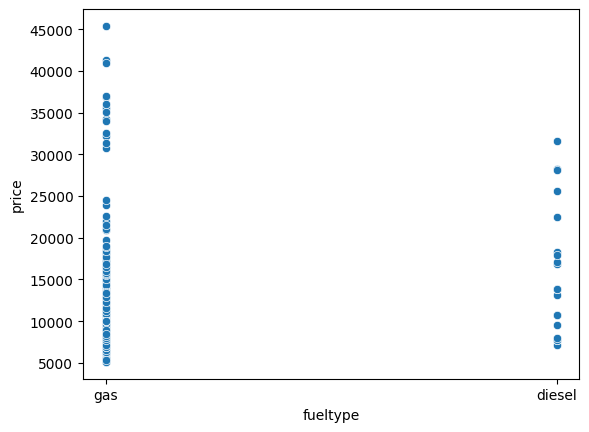

In [71]:
sns.scatterplot(y="price",x="fueltype", data=df)

In [ ]:
numeric_columns = df.select_dtypes(include=["number"]).drop(columns=['price'], axis=1)
